In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 梯度上升法

要找到某函数的最大值，最好的方法是沿着这个函数的梯度方向探寻

In [8]:
def sigmoid(in_x):
    return 1.0/(1+np.exp(-in_x))

In [9]:
def load_dataset():
    data_mat = []
    label_mat = []
    with open("testSet.txt") as file:
        for line in file:
            line_arr = line.strip().split()
            data_mat.append([1.0, float(line_arr[0]), float(line_arr[1])])
            label_mat.append(int(line_arr[2]))
    return data_mat, label_mat

In [11]:
def grad_ascent(data_mat_in, class_labels):
    data_mat = np.mat(data_mat_in)
    label_mat = np.mat(class_labels).transpose()
    m, n = np.shape(data_mat)
    alpha = 0.001
    max_cycles = 500
    weights = np.ones((n, 1))
    for k in range(max_cycles):
        h = sigmoid(data_mat * weights)
        error = (label_mat - h)
        weights = weights + alpha * data_mat.transpose() * error
    return weights

## 随机梯度上升 

在线学习方法：可以在新样本到来时对分类器进行增量式更新

In [23]:
def stoc_grad_ascent0(data_mat, class_labels):
    m, n = np.shape(data_mat)
    alpha = 0.01
    weights = np.ones(n)
    for i in range(m):
        h = sigmoid(np.sum(data_mat[i] * weights))
        error = class_labels[i] - h
        weights = weights + alpha * error * data_mat[i]
    return weights

In [29]:
def stoc_grad_ascent1(data_mat, class_labels, num_iter=150):
    m, n = np.shape(data_mat)
    weights = np.ones(n)
    for j in range(num_iter):
        data_index = list(range(m))
        for i in range(m):
            alpha = 4 / (1.0 + j + i) + 0.01
            rand_index = int(np.random.uniform(0, len(data_index)))
            h = sigmoid(np.sum(data_mat[rand_index] * weights))
            error = class_labels[rand_index] - h
            weights = weights + alpha * error * data_mat[rand_index]
            del(data_index[rand_index])
    return weights

In [12]:
data_arr, label_mat = load_dataset()

In [15]:
weights = grad_ascent(data_arr, label_mat)

In [21]:
def plot_best_fit(weights):
    data_mat, label_mat = load_dataset()
    data_arr = np.array(data_mat)
    n = np.shape(data_arr)[0]
    x_cord1, y_cord1 = [], []
    x_cord2, y_cord2 = [], []
    
    for i in range(n):
        if int(label_mat[i]) == 1:
            x_cord1.append(data_arr[i, 1])
            y_cord1.append(data_arr[i, 2])
        else:
            x_cord2.append(data_arr[i, 1])
            y_cord2.append(data_arr[i, 2])
    
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.scatter(x_cord1, y_cord1, s=30, c='red', marker='s')
    ax.scatter(x_cord2, y_cord2, s=30, c='green')
    x = np.arange(-3.0, 3.0, 0.1)
    y = (-weights[0]-weights[1]*x)/weights[2]
    ax.plot(x, y.T)
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.show()

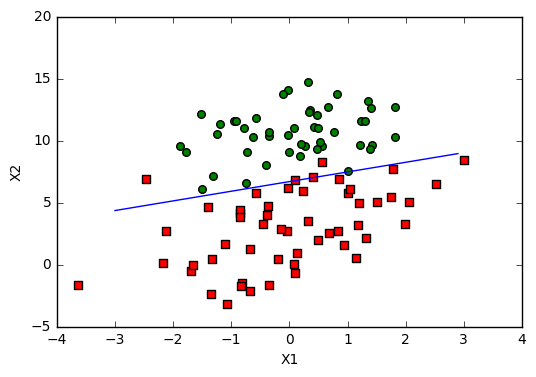

In [22]:
plot_best_fit(weights)

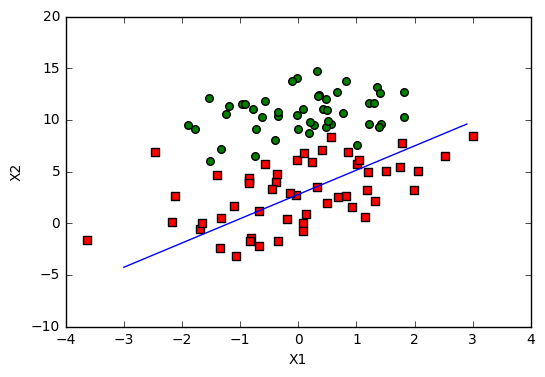

In [25]:
data_arr, label_mat = load_dataset()
weights = stoc_grad_ascent0(np.array(data_arr), label_mat)
plot_best_fit(weights)

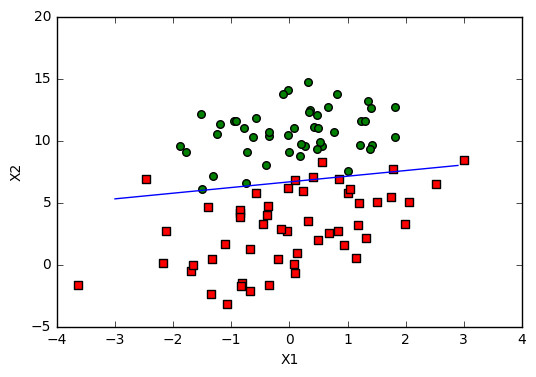

In [30]:
data_arr, label_mat = load_dataset()
weights = stoc_grad_ascent1(np.array(data_arr), label_mat)
plot_best_fit(weights)

# 从疝气病预测病马的死亡率

In [44]:
def classify_vector(in_x, weights):
    prob = sigmoid(np.sum(in_x * weights))
    if prob > 0.5:
        return 1.0
    else:
        return 0.0

In [45]:
def colic_test():
    training_set = []
    training_labels = []
    with open("horseColicTraining.txt") as fr_traing:
        for line in fr_traing:
            cur_line = line.strip().split('\t')
            line_arr = []
            for i in range(21):
                line_arr.append(float(cur_line[i]))
            training_set.append(line_arr)
            training_labels.append(float(cur_line[21]))
    train_weights = stoc_grad_ascent1(np.array(training_set), training_labels, 500)
    
    error_count = 0
    num_test_vec = 0.0
    
    with open("horseColicTest.txt") as fr_test:
        for line in fr_test:
            num_test_vec += 1.0
            cur_line = line.strip().split('\t')
            line_arr = []
            for i in range(21):
                line_arr.append(float(cur_line[i]))
            if int(classify_vector(np.array(line_arr), train_weights)) != int(cur_line[21]):
                error_count += 1
    error_rate = (float(error_count) / num_test_vec)
    print("the error rate of this test is: {}".format(error_rate))
    return error_rate

In [46]:
def multi_test():
    num_tests, error_sum = 10, 0.0
    for k in range(num_tests):
        error_sum += colic_test()
    print("after {} iterations the average error rate is: {}".format(num_tests, error_sum/(float(num_tests))))

In [47]:
multi_test()

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app


the error rate of this test is: 0.3582089552238806
the error rate of this test is: 0.3880597014925373
the error rate of this test is: 0.4925373134328358
the error rate of this test is: 0.3582089552238806
the error rate of this test is: 0.43283582089552236
the error rate of this test is: 0.417910447761194
the error rate of this test is: 0.373134328358209
the error rate of this test is: 0.29850746268656714
the error rate of this test is: 0.29850746268656714
the error rate of this test is: 0.417910447761194
after 10 iterations the average error rate is: 0.3835820895522387
